## Importing the Required Libraries 

Lets import the required libraries first. 

We are already familiar with Pandas, numpy and matplotlib.pyplot libraries.

We will use a new library named "sklearn" for this linear regression task. 

The fourth line of the following code is used to import the sub library called "MLPRegressor" from "sklearn" library in to the python environment. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

The following code is used to read and print the dataset which is saved in the ".csv" format

In [ ]:
data = pd.read_csv('data.csv')
print(data)

## Reshaping the input

Reshaping is used to transform the shape of an array or matrix. 

Reshaping depends on the specific requirements of our chosen AI model. 

Since we are using scikit-learn's MLPRegressor, it typically expects a 2D input array.

Therefore, reshaping it to a column vector as shown in your code is a common practice to ensure compatibility with the model's expectations.

In [ ]:
# Extracting the Circuit Current data and shaping it into a column for input.
x = data['Circuit Current (Ic_A)'].values.reshape(-1, 1)
print(x)

In this line of code, you are extracting the 'Circuit Current (Ic_A)' data from the DataFrame and using .values to convert it into a NumPy array.

The .reshape(-1, 1) part is used to reshape the 1D array into a 2D array with one column.

The following code extracts and prints the values from the "Terminal Voltage (Vt_V)" column in the data dataset, storing them in the variable 'y'.

In [ ]:
# Extracting the Terminal Voltage data for the predicted output.
y = data['Terminal Voltage (Vt_V)'].values
print(y)

## Plotting the Data as a Scatter Plot

In the following code, we used the Matplotlib library to plot the data, which helps us see and understand it better.

You are, already familiar with this scatter plot, labelling and adding gridlines. 

Recall, we have done examples similar to this during the Week-2 of this program.

In [ ]:
plt.scatter(x, y)
plt.xlabel(' Circuit Current (Ic_A)')
plt.ylabel('Terminal Voltage (Vt_V)')
plt.title('Dataset')
plt.grid(True)
plt.show()

## Creating a Smart Guesser with a Neural Network

Here we will build a simple neural network. This neural network will learn from the data we have provided and practice to become really good at making predictions to get a better fit.

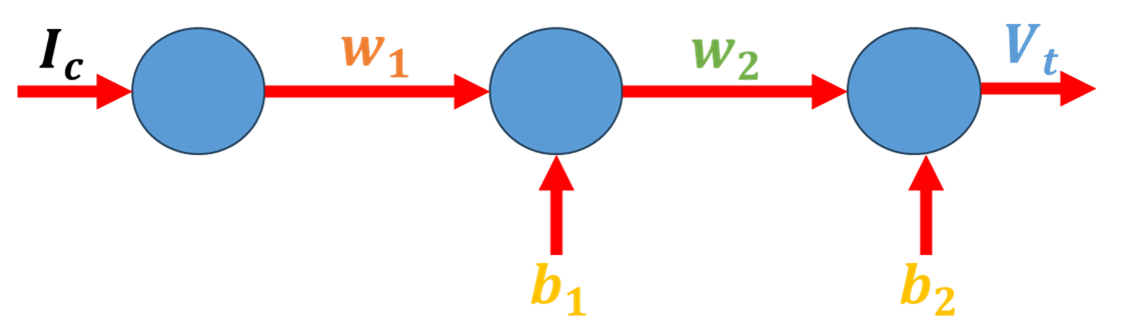
## Remark

In the simple neural network created using "tensorflow and keras" libraries for the same task in week 1, there was no bias attached to the output neuron. However, note that in the neural network architecture created by the sklearn library, a bias is naturaly attched to the output neuron as well.

In week-1, we discussed about the optimizers used to adapt the weights of a neural network during its training or learning process. An optimizer called "LBFGS" is used here. 

The learning rate in the optimizer defines the step size used to reach the minimum of the error function during the learning process.  The learning rate has to be chosen carefully. Too small learning rate will make the learning process too slow. Choosing too large learning rate or step size may result in missing out the error minimum. 

The following code defines the maximum iteration and learning rate parameters for training a neural network.

In [ ]:
# Create and Train a Simple Neural Network
max_iter =2000 # define the number of training cycles or iterations
learning_rate = 0.01  # Choose the learning rate

This code sets up a neural network for regression using scikit-learn's MLPRegressor. 

The network architecture is defined with one hidden layer and one neuron.

The L-BFGS optimization algorithm is chosen for training, and the maximum number of training iterations (max_iter) and the learning rate (learning_rate_init) are configured. 


In [ ]:
# The following codes sets up the neural network, its architecture and training
nn_model = MLPRegressor(hidden_layer_sizes=(1,), max_iter=max_iter, learning_rate_init=learning_rate)
nn_model.fit(x, y)

# Predict using the neural network
#y_pred_nn = nn_model.predict(x)

Now let's train the neural network. 

This code snippet represents an incremental training loop for a neural network. 

First, an empty array is initialized to store the loss values (error values) at each training iteration.

Then the code enters a for loop that iterates defined 'max_iter' times, representing the number of training iterations.

In this code 'nn_model.partial_fit(x, y)', the neural network model (nn_model) is partially fitted or updated with input data (x and y). 

Partial fitting is used for incremental training, where the model learns from a portion of the data in each iteration.

There after, predictions are made for the same input data using the code ' y_pred_partial = nn_model.predict(x)', and the loss values between the actual and predicted values is computed and stored in the loss_values array. 

In this context, we compute the loss as the Mean Squared Error (MSE) value.

In [ ]:
# Initialize an array to store loss values
loss_values = []

# Training loop
for i in range(max_iter):
    nn_model.partial_fit(x, y)  # Partial fit for incremental training
    y_pred_partial = nn_model.predict(x)
    loss = np.mean((y - y_pred_partial) ** 2)
    loss_values.append(loss)
    

In the following code, we create a scatter plot to visualize the training progress of a neural network. 

The x-axis represents the number of training iterations (ranging from 0 to max_iter), while the y-axis represents the error or loss values

In [ ]:
# Plot the loss curve with iteration
plt.scatter(range(max_iter), loss_values)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Function Curve')
plt.show()

The following code prints the final weights and biases, providing insight into the learned parameters of the neural network after it has been trained.

These parameters are essential for understanding how the neural network makes predictions based on its learned features and relationships.

'weight_1' represents the weight from the input to the first neuron in the first hidden layer of the neural network. It is extracted from the nn_model.coefs_ [0].

The [0] refers to the first weight matrix, which is often the matrix of weights between the input layer and the first hidden layer.

Similarly,  'weight_2 = nn_model.coefs_[1]'refer to the second weight matrix, often representing the connections between the first hidden layer and the output layer. 

'bias_1' represents the bias for the first hidden layer of the neural network. It is obtained from the nn_model.intercepts_ [0].

nn_model.intercepts_[0] gives you access to the biase associated with the neurons in the first layer of the neural network. 

Similarly, nn_model.intercepts_[1] gives us access to the biase associated with the neurons in the second layer of the neural network.

You might observe a slight variance in the obtained values compared to the ones you generated. This discrepancy can be attributed to the initial weights that the model randomly assigns at the beginning of the training process.

Indeed, the specific weights and bias values in a neural network can vary from one training session to another and can also differ when implemented by different individuals. 

In [ ]:
# Printing the final weights of the trained neural network 
weight_1 = nn_model.coefs_[0]  # Weight from input to first neuron in first hidden layer
print("Weight 1:", weight_1)

weight_2 = nn_model.coefs_[1] # Weight from input to second neuron in first hidden layer
print("Weight 2:", weight_2)

bias_1 = nn_model.intercepts_[0] # Bias for the first hidden layer
print("Bias1:", bias_1)

bias_2 = nn_model.intercepts_[1]  # Bias for the output layer
print("Bias2:", bias_2)

The code provided below calculates the equation of the fit line in the form "y = mx + c" using the weights and biases determined.

The first line calculates the product of weight_1 and weight_2 and stores it in the variable 'm'. In the context of a linear equation, 'm' represents the slope or gradient of the line.

Second line calculates the  the value of 'c'. In the context of a linear equation, c represents the y-intercept or the value of the dependent variable (y) when the independent variable (x) is zero.

In [ ]:
#Construct the equation
m=weight_1*weight_2
c=(weight_2*bias_1)+bias_2 
print(m,"x", "+",c)

Now let's plot and see the fitted line with the actual data points. 

This code generates a scatter plot that displays the actual data points as blue dots and the predictions made by a neural network model as a red line.  

In [ ]:
# Plot the dataset and neural network predictions
plt.scatter(x, y, label='Actual')
plt.plot(x, y_pred_partial, color='red', label='Predicted')
plt.xlabel('Circuit Current (Ic_A)')
plt.ylabel('Terminal Voltage (Vt_V)')

plt.title('Neural Network Predictions')
plt.legend()
plt.show()
